In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()  # Show first 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum() # DATA CLEANING

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing ages

In [5]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing values with the most frequent category

In [6]:
df.drop(columns=['Cabin'], inplace=True)  # Drop Cabin column permanently


In [7]:
print(df.isnull().sum())  # Recheck missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert male/female to 0/1


In [9]:
print(df.columns)  # Show all column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [10]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [11]:
print(df.columns)  # Show all column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [12]:
print(df.head())  # Display first few rows


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

In [13]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
print(df.head())  # Check the updated dataframe

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df.head())  # Check scaled values


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845       False   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


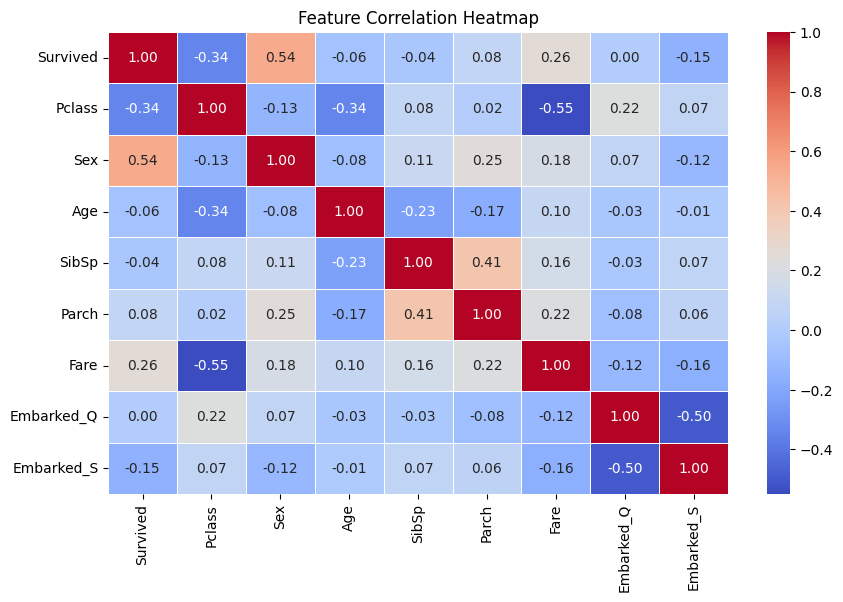

In [15]:
# FEATURE SELECTION
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


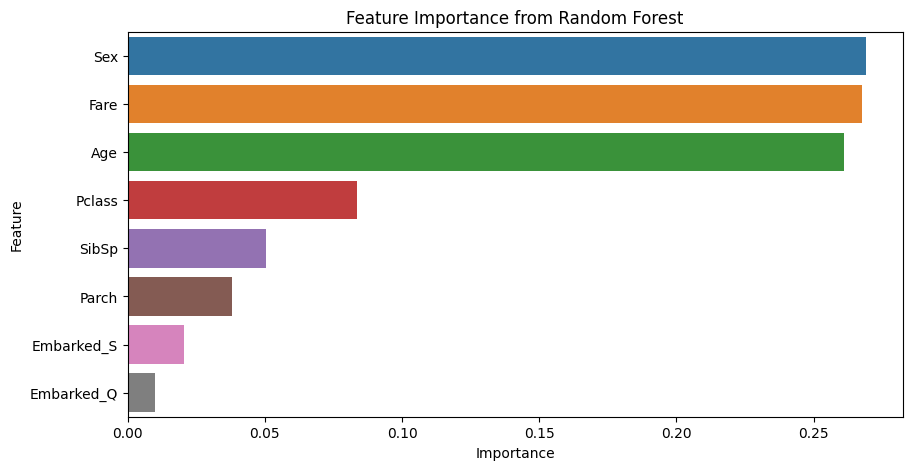

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df.drop(columns=["Survived"])  # Drop target variable
y = df["Survived"]

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define model for RFE
logreg = LogisticRegression(max_iter=1000)

# Perform RFE with 5 best features
rfe = RFE(estimator=logreg, n_features_to_select=5)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_S'], dtype='object')


In [1]:
# MODEL TRAINING
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # To split data
from sklearn.tree import DecisionTreeClassifier  # The model we are training
from sklearn.metrics import accuracy_score  # To check how well the model performs


In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")  # Load the dataset

# Selecting useful columns
df = df[['Pclass', 'Sex', 'Age', 'Survived']]

# Remove missing values
df.dropna(inplace=True)

# Convert categorical values to numbers (Sex: male = 0, female = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print(df.head())  # Show first 5 rows


   Pclass  Sex   Age  Survived
0       3    0  22.0         0
1       1    1  38.0         1
2       3    1  26.0         1
3       1    1  35.0         1
4       3    0  35.0         0


In [5]:
# Features (inputs) and target (output)
X = df[['Pclass', 'Sex', 'Age']]  # Inputs
y = df['Survived']  # What we are predicting

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")


Training size: (571, 3), Testing size: (143, 3)


In [6]:
model = DecisionTreeClassifier()  # Create the model
model.fit(X_train, y_train)  # Train the model using training data


DecisionTreeClassifier()

In [7]:
y_pred = model.predict(X_test)  # Predict on test data
print(y_pred[:10])  # Show first 10 predictions


[0 1 1 1 0 0 0 1 0 1]


In [8]:
# EVALUATION
accuracy = accuracy_score(y_test, y_pred)  # Compare predictions with actual results
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.78


In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[73 14]
 [18 38]]


In [10]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")


Precision: 0.73


In [11]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")


Recall: 0.68


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


Model Accuracy: 0.78
Confusion Matrix:
 [[73 14]
 [18 38]]
Precision: 0.73
Recall: 0.68
F1 Score: 0.70
